# Scikit Learn ile Doğrusal Regresyon (Linear Regression)

![](https://i.imgur.com/1EzyZvj.png)


Bu eğitimde aşağıdaki konular ele alınmaktadır:

- Makine öğrenimi için tipik bir sorun bildirimi
- Makine öğrenimi için bir veri kümesini indirme ve keşfetme
- Scikit-learn kullanarak tek değişkenli doğrusal regresyon (linear regression)
- Birden çok değişkenli doğrusal regresyon (linear regression)
- Makine öğrenimi için kategorik özellikleri kullanma
- Regresyon (regression) katsayıları ve özellik önemi
- Scikit-learn kullanarak regresyon (regression) için diğer modeller ve teknikler
- Diğer veri kümelerine doğrusal regresyon (linear regression) uygulama

## Problem Tanımı

Bu eğitim, pratik ve kodlama odaklı bir yaklaşım benimser. _Makine öğrenimi_ ve _doğrusal regresyon (linear regression)_ terimlerini bir problem bağlamında tanımlayacağız ve daha sonra tanımlarını genelleştireceğiz. Adım adım tipik bir makine öğrenimi problemi üzerinde çalışacağız:

> **SORU**: ACME Insurance Inc., Amerika Birleşik Devletleri'nin her yerindeki binlerce müşteriye uygun fiyatlı sağlık sigortası sunmaktadır. ACME'de baş veri bilimcisi olarak, yaş, cinsiyet, vücut kitle endeksi (BMI), çocuklar, sigara içme alışkanlıkları ve ikamet ettikleri bölge gibi bilgileri kullanarak **yeni müşterilerin yıllık medikal harcamalarını tahmin etmek için otomatik bir sistem oluşturmakla görevlisiniz**.
>
> Müşteriye sunulan yıllık sigorta primini (her ay ödenen tutar) belirlemek için sisteminizden gelen tahminler kullanılacaktır. Düzenleyici gereksinimler nedeniyle, sisteminizin neden belirli bir tahmin verdiğini açıklayabilmeniz gerekir.
> Size, 1300'den fazla müşteri tarafından gerçekleştirilen, bahsi geçen bilgilerden ve gerçek medikal ücretlerden oluşan, doğrulanmış geçmiş verileri içeren bir [CSV dosyası](https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv) verildi.
> <img src="https://i.imgur.com/87Uw0aG.png" width="480">
>
> Veri kümesi kaynağı: https://github.com/stedy/Machine-Learning-with-R-datasets

**ALIŞTIRMA**: Daha fazla ilerlemeden önce, bu soruna nasıl yaklaşabileceğinizi düşünmek için bir dakikanızı ayırın. Aklınıza gelen beş veya daha fazla fikri aşağıda listeleyin:
 
 1. ???
 2. ???
 3. ???
 4. ???
 5. ???

## Verileri indirme

Başlamak için, `urllib.request`'ten `urlretrieve` fonksiyonunu kullanarak verileri indirelim.

In [ ]:
medikal_masraflar_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [ ]:
from urllib.request import urlretrieve

In [ ]:
urlretrieve(medikal_masraflar_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7f6cd3b4c650>)

Artık verileri görüntülemek ve analiz etmek için indirilen dosyayı kullanarak bir Pandas veri çerçevesi (dataframe) oluşturabiliriz.

In [ ]:
import pandas as pd

In [ ]:
medikal_df = pd.read_csv('medical.csv')

In [ ]:
medikal_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Veri kümesi 1338 satır ve 7 sütun içerir. Veri kümesinin her satırı bir müşteri hakkında bilgi içerir.

Amacımız, diğer sütunlardaki değerleri kullanarak `masraflar (charges)` sütunundaki değeri tahmin etmenin bir yolunu bulmaktır. Bunu geçmiş veriler için yapabilirsek, yeni müşteriler için de yalnızca ` yaşları` , ` cinsiyetleri` , ` vücut kitle endeksleri (BMI)` , ` çocuk sayısı` , ` sigara alışkanlığı`  ve ` bölge`  gibi bilgileri isteyerek ücretleri tahmin edebilmeliyiz. 

Her sütun için veri türünü kontrol edelim.

In [ ]:
medikal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Göründüğü gibi ` yaş` , ` çocuklar` , ` bmi`  ([vücut kitle indeksi](https://en.wikipedia.org/wiki/Body_mass_index)) ve ` masraflar`  integer'dır. Oysa ` cinsiyet` , ` sigara içen`  ve ` bölge`  string'dir (muhtemelen kategoriler). Sütunların hiçbiri eksik değer (missing value) içermiyor, bu da bize biraz iş kazandırıyor!

In [ ]:
medikal_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Sayısal sütunlardaki değer aralıkları da makul görünüyor (negatif yaş yok!). Bu nedenle fazla veri temizleme veya düzeltme yapmamız gerekmeyebilir. Ancak, medyan (yüzde 50) maksimum değerden çok daha düşük olduğu için ` masraflar`  sütunu önemli ölçüde eğik/yamuk görünüyor.


> **ALIŞTIRMA**: Yukarıdaki tabloya bakarak başka hangi çıkarımları yapabilirsiniz? Çıkarımlarınızı aşağıya ekleyin:
>
> 1. ???
> 2. ???
> 3. ???
> 4. ???
> 5. ???

## Keşifsel Analiz ve Görselleştirme

Veri kümesinin bazı sütunlarındaki değerlerin dağılımını ve ` ücretler`  ile diğer sütunlar arasındaki ilişkileri görselleştirerek verileri keşfedelim.

Görselleştirme için Matplotlib, Seaborn ve Plotly kütüphanelerini kullanacağız. Bu kütüphanelerin nasıl kullanılacağını öğrenmek için bu eğitimleri izleyin:

- https://jovian.ai/aakashns/python-matplotlib-data-visualization
- https://jovian.ai/aakashns/interactive-visualization-plotly
- https://jovian.ai/aakashns/dataviz-cheatsheet

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Aşağıdaki ayarlar, çizelgelerimiz için varsayılan stili ve yazı tipi boyutlarını iyileştirecektir.

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Age (Yaş)

` Yaş`  sayısal bir sütundur. Veri setindeki minimum yaş 18 ve maksimum yaş 64'tür. Böylece yaş dağılımını 47 kutu (her yıl için bir tane) içeren bir histogram ve kutu grafiği (box plot) kullanarak görselleştirebiliriz. Çizelgeyi etkileşimli hale getirmek için plotly'i kullanacağız. Ancak Seaborn'u kullanarak benzer çizelgeler oluşturabiliriz.

In [ ]:
medikal_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [ ]:
fig = px.histogram(medikal_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Yaş Dağılımı')
fig.update_layout(bargap=0.1)
fig.show()

Veri setindeki yaş dağılımı, diğer yaşlardan iki kat daha fazla müşteriye sahip gibi görünen 18 ve 19 yaşları hariç, her yaştan 20-30 müşteri ile neredeyse tekdüzedir (uniform). Tekdüze dağılım, ABD'de [herhangi bir yaştaki insan sayısında](https://www.statista.com/statistics/241488/population-of-the-us-by-sex-and-age/) (18 ve 64 arası) büyük bir değişiklik olmamasından kaynaklanabilir.



> **ALIŞTIRMA**: 18 ve 19 yaşındaki müşterilerin diğer yaşlara göre neden iki katından fazla olduğunu açıklayabilir misiniz?
>
> ???

### Vücut Kitle İndeksi (BMI)

Histogram ve kutu grafiği kullanarak müşterilerin vücut kitle indeksi dağılımına bakalım.

In [ ]:
fig = px.histogram(medikal_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Vücut Kitle İndeksi Dağılımı')
fig.update_layout(bargap=0.1)
fig.show()

Vücut kitle indeksi ölçümleri, sağa doğru birkaç uç değerle, 30 değeri etrafında merkezlenmiş bir [Gauss dağılımı](https://en.wikipedia.org/wiki/Normal_distribution) oluşturuyor gibi görünüyor. İşte vücut kitle indeksi değerlerinin nasıl yorumlanabileceği ([kaynak](https://study.com/academy/lesson/what-is-bmi-definition-formula-calculation.html)):

![](https://i.imgur.com/lh23OiY.jpg)

> **ALIŞTIRMA**: Vücut kitle indekslerin dağılımı gauss dağılımı oluştururken, yaş dağılımının neden tekdüze (uniform) bir dağılım oluşturduğunu açıklayabilir misiniz?
>
> ???

### Masraflar (Charges)

` Masraflar` , yani müşteriler için yıllık medikal ücretlerin dağılımını görselleştirelim. Bu, tahmin etmeye çalıştığımız sütun. Sigara içenler ve içmeyenler için ücretleri ayırt etmek için ` sigara içen`  kategorik sütununu da kullanalım.

In [ ]:
fig = px.histogram(medikal_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Yıllık Medikal Masraflar')
fig.update_layout(bargap=0.1)
fig.show()

Yukarıdaki grafikten aşağıdaki gözlemleri yapabiliriz:

* Çoğu müşteri için yıllık medikal masraflar 10.000$'ın altındadır. Müşterilerin yalnızca küçük bir kısmı, muhtemelen kazalar, büyük hastalıklar ve genetik hastalıklar nedeniyle daha yüksek tıbbi harcamalara sahiptir. Dağıtım bir "güç yasasını" takip eder.

* Sigara içenler ve içmeyenler arasında sağlık harcamalarında önemli bir fark vardır. Sigara içmeyenler için medyan 7300$ iken, sigara içenler için medyan \$35,000 civarındadır.



> **ALIŞTIRMA**: `Cinsiyet` ve `bölge` gibi diğer faktörlerle bağlantılı olarak medikal ücretlerin dağılımını gözünüzde canlandırın. Ne gözlemliyorsunuz?

### Sigara İçen (Smoker)

Bir histogram kullanarak `sigara içen` sütununun ("evet" ve "hayır" değerlerini içeren) dağılımını görselleştirelim.

In [ ]:
medikal_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
px.histogram(medikal_df, x='smoker', color='sex', title='Sigara İçenler')

Müşterilerin %20'sinin sigara içtiğini bildirdiği görülüyor. Verilerin 2010'da toplandığını varsayarak, bunun ulusal ortalamayla eşleşip eşleşmediğini doğrulayabilir misiniz? Sigara içmenin erkekler arasında daha yaygın bir alışkanlık olduğunu da görebiliriz. Bunu doğrulayabilir misiniz?

> **ALIŞTIRMA**: `Cinsiyet`, `bölge` ve `çocuklar` sütunlarının dağılımlarını görselleştirelim ve gözlemlerimizi rapor edelim.

Tek tek sütunlara baktıktan sonra, artık `ücretler` (tahmin etmek istediğimiz değer) ile diğer sütunlar arasındaki ilişkiyi görselleştirebiliriz.

### Yaş (Age) and Masraflar (Charges)

Bir dağılım grafiği kullanarak `yaş` ve `masraflar` arasındaki ilişkiyi görselleştirelim. Dağılım grafiğindeki her nokta bir müşteriyi temsil eder. Noktaları renklendirmek için `sigara içen` sütunundaki değerleri de kullanacağız.

In [ ]:
fig = px.scatter(medikal_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Yaş vs. Masraflar')
fig.update_traces(marker_size=5)
fig.show()

Yukarıdaki tablodan şu gözlemleri yapabiliriz:

* Genel eğilim, beklediğimiz gibi, medikal ücretlerin yaşla birlikte artması gibi görünüyor. Bununla birlikte, her yaşta önemli farklılıklar vardır ve tek başına yaşın medikal masrafları doğru bir şekilde belirlemek için kullanılamayacağı açıktır.

* Her biri artan eğimli bir çizgi oluşturuyor gibi görünen üç nokta "kümesi" görebiliriz:

     1. İlk ve en büyük küme, diğerlerine kıyasla nispeten düşük tıbbi ücretleri olan muhtemelen "sağlıklı sigara içmeyenlerden" oluşur.
     
     2. İkinci küme, sigara içen ve içmeyenlerin bir karışımını içerir. Bunların aslında iki farklı ancak örtüşen küme olması mümkündür: "Medikal sorunları olan sigara içmeyenler" ve "önemli medikal sorunları olmayan sigara içenler".
     
     3. Son küme, yalnızca sigara içenlerden, muhtemelen sigarayla ilişkili veya sigarayla kötüleşen önemli medikal sorunları olan sigara içenlerden oluşur.
     

> **ALIŞTIRMA**: Yukarıdaki tablodan başka hangi çıkarımları yapabiliriz?
>
> ???

### BMI (Vücut Kitle Endeksi) ve Masraflar (Charges)

BMI (vücut kitle indeksi) ile masraflar (charges) arasındaki ilişkiyi başka bir dağılım grafiği kullanarak görselleştirelim. Bir kez daha, noktaları renklendirmek için `sigara içen` sütunundaki değerleri kullanacağız.

In [ ]:
fig = px.scatter(medikal_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Vücut Kitle Endeksi vs. Masraflar')
fig.update_traces(marker_size=5)
fig.show()

Sigara içmeyenlerde BMI'deki artışın medikal ücretlerdeki artışla ilişkili olmadığı görülüyor. Bununla birlikte, BMI'si 30'un üzerinde olan sigara içenler için medikal ücretler önemli ölçüde daha yüksek görünmektedir.

Yukarıdaki grafikten başka hangi öngörüleri elde edebiliriz?

> **ALIŞTIRMA**: `Charges` sütununun diğer sütunlarla (`çocuklar`, `cinsiyet`, `bölge` ve `sigara içen`) nasıl ilişkili olduğunu görselleştirmek için biraz daha grafik oluşturalım. Bu grafiklerden toplanan bilgileri özetleyelim.
>
> *İpucu*: Keman grafiklerini (`px.violin`) ve çubuk grafiklerini (`sns.barplot`) kullanın.

### Korelasyon

Analizden de anlaşılacağı gibi, bazı sütunlardaki değerler, diğer sütunlara kıyasla "masraflar" içindeki değerlerle daha yakından ilgilidir. Örneğin. "yaş" ve "masraflar" birlikte büyürken, "vücut kitle indeksi" ve "masraflar" birlikte büyümez.

Bu ilişki genellikle, bir Pandas serisinin `.corr` yöntemi kullanılarak hesaplanabilen _korelasyon katsayısı_ adı verilen bir ölçü kullanılarak sayısal olarak ifade edilir.

In [ ]:
medikal_df.charges.corr(medikal_df.age)

0.2990081933306476

In [ ]:
medikal_df.charges.corr(medikal_df.bmi)

0.19834096883362895

Kategorik sütunların korelasyonunu hesaplamak için önce sayısal sütunlara dönüştürülmeleri gerekir.

In [ ]:
sigara_icen_degerleri = {'no': 0, 'yes': 1}

In [ ]:
sigara_icen_sayisal = medikal_df.smoker.map(sigara_icen_degerleri)

In [ ]:
medikal_df.charges.corr(sigara_icen_sayisal)

0.787251430498478

Korelasyon katsayılarının nasıl yorumlanabileceği aşağıda açıklanmıştır ([kaynak](https://statisticsbyjim.com/basics/correlations)):

* **Güç**: Korelasyon katsayısının mutlak değeri ne kadar büyükse, ilişki o kadar güçlüdür.

    * -1 ve 1'in uç değerleri, bir değişkendeki bir değişikliğin diğerinde tamamen tutarlı bir değişikliğin eşlik ettiği mükemmel bir doğrusal ilişkiyi gösterir. Bu ilişkiler için tüm veri noktaları bir doğru üzerine düşer. Pratikte, her iki tür mükemmel ilişkiyi de göremezsiniz.

    * Sıfır katsayısı doğrusal bir ilişkiyi temsil etmez. Değişkenlerden biri artarken diğer değişkende artma veya azalma eğilimi yoktur.

    * Değer 0 ile +1/-1 arasında olduğunda bir ilişki vardır, ancak noktaların tümü bir doğru üzerine düşmez. r, -1 veya 1'e yaklaştıkça ilişkinin gücü artar ve veri noktaları bir çizgiye yaklaşma eğilimi gösterir.


* **Yön**: Korelasyon katsayısının işareti ilişkinin yönünü temsil eder.

    * Pozitif katsayılar, bir değişkenin değeri arttığında diğer değişkenin değerinin de artma eğiliminde olduğunu gösterir. Pozitif ilişkiler, bir dağılım grafiğinde yukarı doğru bir eğim oluşturur.
    
    * Negatif katsayılar, bir değişkenin değerinin arttığı, diğer değişkenin değerinin düşme eğiliminde olduğu durumları temsil eder. Negatif ilişkiler aşağı doğru bir eğim oluşturur.

İşte görsel olarak ifade edilen aynı ilişki ([kaynak](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)):

<img src="https://i.imgur.com/3XUpDlw.png" width="360">

Korelasyon katsayısı aşağıdaki formüle sahiptir:

<img src="https://i.imgur.com/unapugP.png" width="360">

Korelasyonun matematiksel tanımı ve geometrik yorumu hakkında daha fazla bilgiyi buradan edinebilirsiniz: https://www.youtube.com/watch?v=xZ_z8KWkhXE

Ayrıca, Pandas veri çerçeveleri, tüm sayısal sütun çiftleri arasındaki korelasyon katsayılarını hesaplamak için bir `.corr` yöntemi sağlar.

In [ ]:
medikal_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


`.corr` sonucu korelasyon matrisi olarak adlandırılır ve genellikle bir ısı haritası (heatmap) kullanılarak görselleştirilir.

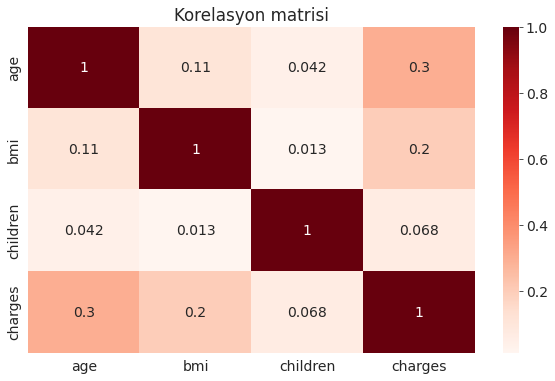

In [ ]:
sns.heatmap(medikal_df.corr(), cmap='Reds', annot=True)
plt.title('Korelasyon matrisi');

**Korelasyon vs Nedensellik Yanılgısı (causation fallacy):** Özellikler arasındaki neden-sonuç ilişkisini yorumlamak için yüksek bir korelasyonun kullanılamayacağını unutmayın. Eğer $X$ $Y$'ye veya $Y$, $X$'e neden oluyorsa veya her ikisine de bağımsız olarak başka bir $Z$ faktörü neden oluyorsa, $X$ ve $Y$ arasında bağıntı (correlation) kurulabilir ve neden-sonuç ilişkilerinden biri bozulursa, korelasyon artık doğru olmayacaktır. Örnek çok küçük olduğu için $X$'in $Y$'nin basitçe korelasyonlu görünmesi de mümkündür.

Bu açık görünse de, bilgisayarlar korelasyon ve nedensellik arasında ayrım yapamaz ve otomatik sisteme dayalı kararlar genellikle toplum üzerinde önemli sonuçlar doğurabilir, bu nedenle otomatik sistemlerin neden belirli bir sonuca yol açtığını incelemek önemlidir. Sebep-sonuç ilişkilerini belirlemek, insan içgörüsü gerektirir.

## Single Feature kullanarak Linear Regression 

Artık "sigara içen" ve "yaş" sütunlarının "masraflar" ile en güçlü korelasyona sahip olduğunu biliyoruz. Sigara içmeyenler için "yaş" değerini kullanarak "masrafların" değerini tahmin etmenin bir yolunu bulmaya çalışalım. İlk olarak, sadece sigara içmeyenler için verileri içeren bir veri çerçevesi oluşturalım.

In [ ]:
sigara_icmeyen_df = medikal_df[medikal_df.smoker == 'no']

Şimdi, "yaş" ve "masraflar" arasındaki ilişkiyi görselleştirelim.

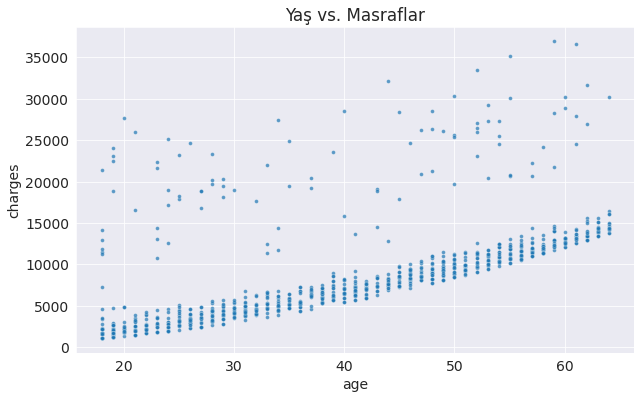

In [ ]:
plt.title('Yaş vs. Masraflar')
sns.scatterplot(data=sigara_icmeyen_df, x='age', y='charges', alpha=0.7, s=15);

Birkaç istisna dışında, noktalar bir çizgi oluşturuyor gibi görünüyor. Bu noktaları kullanarak bir çizgiyi "uydurmaya (fit)" çalışacağız ve çizgiyi belirli bir yaş için masrafları tahmin etmek için kullanacağız. X&Y koordinatları üzerindeki bir çizgi aşağıdaki formüle sahiptir:

$y = wx + b$

Çizgi iki sayı ile karakterize edilir: $w$ ("eğim" olarak adlandırılır) ve $b$ ("kesişme" olarak adlandırılır).

### Model

Yukarıdaki durumda, x ekseni "yaş"ı ve y ekseni "masrafları" gösterir. Böylece, ikisi arasında aşağıdaki ilişkiyi varsayıyoruz:

$masraflar = w \times yas (age) + b$

Verilere en iyi uyan (fit eden) doğru için $w$ ve $b$'yi belirlemeye çalışacağız.

* Bu tekniğe _doğrusal regresyon (linear regression)_ denir ve "yaş" ile "masraflar" arasındaki ilişkiyi düz bir çizgi olarak modellediği için yukarıdaki denklemi bir _doğrusal regresyon modeli (linear regression model)_ olarak adlandırırız.

* $w$ ve $b$ sayılarına modelin _parametreleri_ veya _ağırlıkları_ denir.

* Veri kümesinin "yaş" sütunundaki değerler, modelin _girdileri (inputs)_ olarak adlandırılır ve masraflar sütunundaki değerler "hedefler (targets)" olarak adlandırılır.

$masrafları$ hesaplamak için verilen $yas (age)$, $w$ ve $b$ değerleri için bir yardımcı fonksiyon `tahmini_masraflar` tanımlayalım.

In [ ]:
def masraflari_tahmin_et(yas, w, b):
    return w * yas + b

`tahmini_masraflar` fonksiyonu bizim ilk _modelimizdir_.

$w$ ve $b$ değerlerini _tahmin_ edelim ve bunları masrafların değerini tahmin etmek için kullanalım.

In [ ]:
w = 50
b = 100

In [ ]:
yaslar = sigara_icmeyen_df.age
tahmini_masraflar = masraflari_tahmin_et(yaslar, w, b)

Bir çizgi grafiği kullanarak tahmini masrafları çizebiliriz.

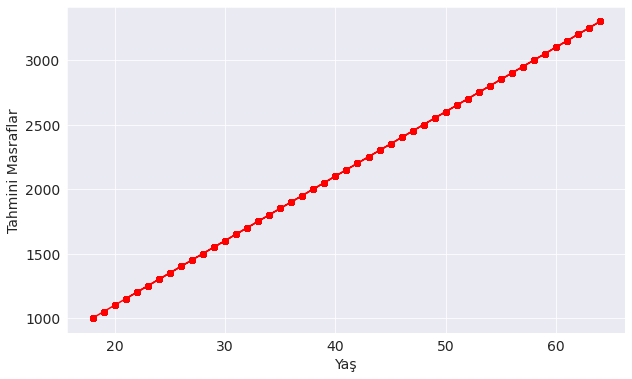

In [ ]:
plt.plot(yaslar, tahmini_masraflar, 'r-o');
plt.xlabel('Yaş');
plt.ylabel('Tahmini Masraflar');

Beklendiği gibi, noktalar düz bir çizgi üzerindedir.

Bu satırı gerçek veriler üzerine bindirebiliriz, bu yüzden _modelimizin_ _verilere_ ne kadar iyi uyduğunu görelim.

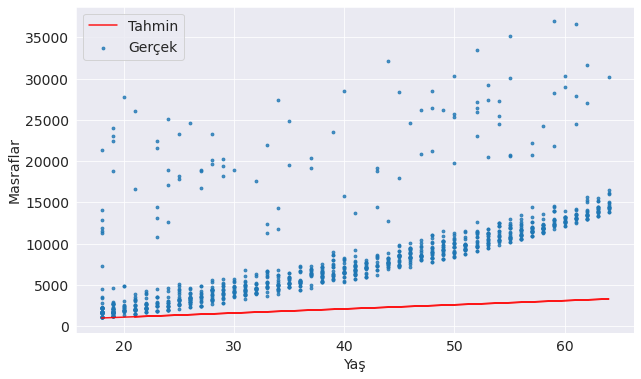

In [ ]:
hedef = sigara_icmeyen_df.charges

plt.plot(yaslar, tahmini_masraflar, 'r', alpha=0.9);
plt.scatter(yaslar, hedef, s=8, alpha=0.8);
plt.xlabel('Yaş');
plt.ylabel('Masraflar')
plt.legend(['Tahmin', 'Gerçek']);

Açıkçası, tahminlerimiz oldukça zayıf ve çizgi verilere "uymuyor" (fit). Ancak, çizgiyi hareket ettirmek için farklı $w$ ve $b$ değerlerini deneyebiliriz. `w` ve `b`'yi girdi (input) olarak alan ve yukarıdaki grafiği oluşturan bir yardımcı fonksiyon `parametreleri_dene` tanımlayalım.

In [ ]:
def parametreleri_dene(w, b):
    yaslar = sigara_icmeyen_df.age
    hedef = sigara_icmeyen_df.charges
    
    tahmini_masraflar = masraflari_tahmin_et(yaslar, w, b)
    
    plt.plot(yaslar, tahmini_masraflar, 'r', alpha=0.9);
    plt.scatter(yaslar, hedef, s=8, alpha=0.8);
    plt.xlabel('Yaş');
    plt.ylabel('Masraflar')
    plt.legend(['Tahmin', 'Gerçek']);

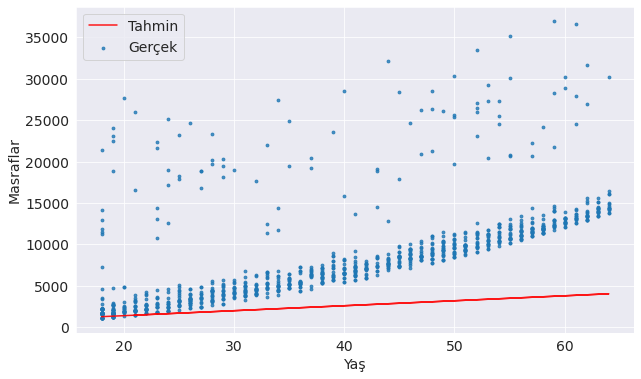

In [ ]:
parametreleri_dene(60, 200)

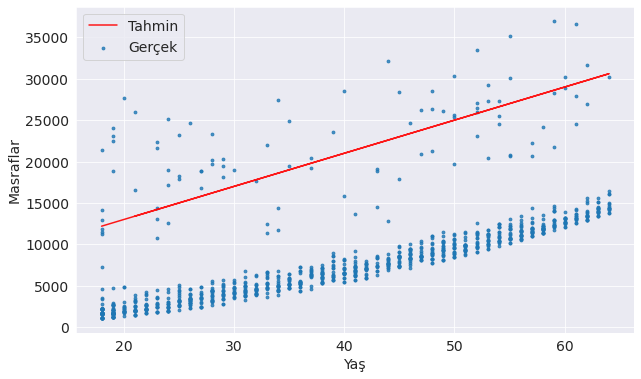

In [ ]:
parametreleri_dene(400, 5000)

> **ALIŞTIRMA**: Verilere en uygun doğruyu bulmak için çeşitli $w$ ve $b$ değerlerini deneyelim. $w$ değerini değiştirmenin etkisi nedir? $b$'yi değiştirmenin etkisi nedir?

### Kayıp/Maliyet Fonksiyonu (Loss/Cost Function)


Aşağıdaki yöntemi kullanarak modelimizin tahminlerini gerçek hedeflerle karşılaştırabiliriz:

* Hedefler ve tahminler arasındaki farkı hesaplayalım. [Farklılığa "artık (residual)" denir.]
* Negatif değerleri kaldırmak için fark matrisinin tüm öğelerinin karesini alalım.
* Ortaya çıkan matristeki öğelerin ortalamasını hesaplayalım.
* Sonucun karekökünü alalım.

Sonuç, **kök ortalama kare hatası** (RMSE:**root mean squared error**) olarak bilinen tek bir sayıdır. Yukarıdaki açıklama matematiksel olarak aşağıdaki gibi ifade edilebilir:

<img src="https://i.imgur.com/WCanPkA.png" width="360">

Geometrik olarak, artıklar (residuals) aşağıdaki gibi görselleştirilebilir:

<img src="https://i.imgur.com/ll3NL80.png" width="420">

RMSE'yi hesaplamak için bir fonksiyon tanımlayalım.

In [ ]:
import numpy as np

In [ ]:
def rmse(hedefler, tahminler):
    return np.sqrt(np.mean(np.square(hedefler - tahminler)))

RMSE'yi hesaplamak için bir fonksiyon tanımlayalım.

In [ ]:
w = 50
b = 100

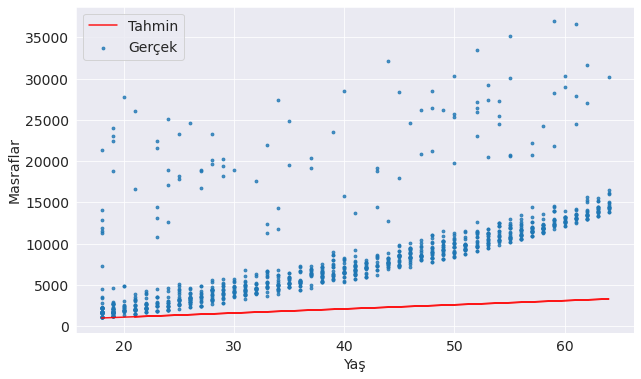

In [ ]:
parametreleri_dene(w, b)

In [ ]:
hedefler = sigara_icmeyen_df['charges']
tahmin = masraflari_tahmin_et(sigara_icmeyen_df.age, w, b)

In [ ]:
rmse(hedefler, tahmin)

8461.949562575488

Yukarıdaki sayıyı şu şekilde yorumlayabiliriz: *Ortalama olarak, tahmindeki her öğe gerçek hedeften \\$8461* farklıdır.

Sonuç, modelin hedef değişkenleri tahmin etmede ne kadar kötü olduğunu gösterdiği için *kayıp* olarak adlandırılır. Modeldeki, bilgi kaybını temsil eder: Kayıp ne kadar düşükse model o kadar iyidir.

Kaybı da görüntülemek için `parametreleri_dene` fonksiyonlarını değiştirelim.

In [ ]:
def parametreleri_dene(w, b):
    yaslar = sigara_icmeyen_df.age
    hedef = sigara_icmeyen_df.charges
    tahminler = masraflari_tahmin_et(yaslar, w, b)
    
    plt.plot(yaslar, tahminler, 'r', alpha=0.9);
    plt.scatter(yaslar, hedef, s=8, alpha=0.8);
    plt.xlabel('Yaş');
    plt.ylabel('Masraflar')
    plt.legend(['Tahmin', 'Gerçek']);
    
    kayip = rmse(hedef, tahminler)
    print("RMSE Kayıp: ", kayip)

RMSE Kayıp:  8461.949562575488


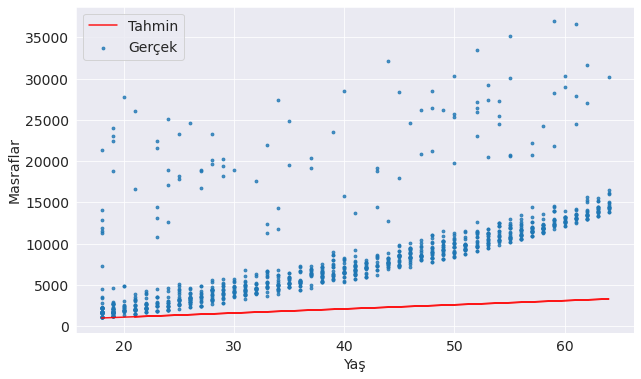

In [ ]:
parametreleri_dene(50, 100)

> **ALIŞTIRMA**: RMSE kaybını en aza indirmek için $w$ ve $b$'nin farklı değerlerini deneyin. Ulaşabileceğiniz en düşük kayıp değeri nedir? Deneme yanılma yoluyla $w$ ve $b$'nin daha iyi değerlerini bulmak için genel bir strateji ile gelebilir misiniz?

### Optimize Edici (Optimizer)

Daha sonra, kaybı azaltmak ve satırın verilere "uyumunu" (fit) iyileştirmek için `w` ve `b` ağırlıklarını değiştirmek için bir stratejiye ihtiyacımız var.


* En Küçük Kareler Yöntemi (Ordinary Least Squares): https://www.youtube.com/watch?v=szXbuO3bVRk (daha küçük veri kümeleri (dataset) için daha iyi)

* Olasılıksal gradyan inişi (Stochastic gradient descent): https://www.youtube.com/watch?v=sDv4f4s2SB8 (daha büyük veri kümeleri (dataset) için daha iyi)


Bunların her ikisinin de amacı aynıdır: Kaybı en aza indirmek, ancak sıradan en küçük kareler (ordinary least squares), matris işlemlerini kullanarak `w` ve `b` için en iyi değerleri doğrudan hesaplarken, gradyan iniş (gradient descent), rastgele `w` ve `b` değerleriyle başlayan ve türevleri kullanarak bunları yavaş yavaş iyileştiren yinelemeli (iterative) bir yaklaşım kullanır.

İşte gradyan inişinin (gradient descent) nasıl çalıştığına dair bir görselleştirme:

![](https://miro.medium.com/max/1728/1*NO-YvpHHadk5lLxtg4Gfrw.gif)

Çizgiyi kademeli olarak noktalara yaklaştırmaya yönelik kendi stratejimize benzemiyor mu?



### Scikit-learn kullanarak Doğrusal Regresyon (Linear Regression)

Pratikte, yukarıdaki yöntemlerden herhangi birini asla kendiniz uygulamanız gerekmeyecek. Bunu yapmak için `scikit-learn` gibi bir kütüphane kullanabiliriz.

Sıradan en küçük kareler (ordinary least squares) optimizasyon tekniğini kullanarak yaş (age) vs. masraflar (charges) için en uygun doğruyu bulmak için `scikit-learn`'den `LinearRegression` sınıfını kullanalım.

In [ ]:
from sklearn.linear_model import LinearRegression

İlk olarak yeni bir model nesnesi oluşturuyoruz.

In [ ]:
model = LinearRegression()

Daha sonra, girdiler (inputs) ve hedefler (targets) için en uygun çizgiyi bulmak için modelin `fit` yöntemini kullanabiliriz.

In [ ]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



`X` girişi (input'u) 2 boyutlu bir dizi (array) olmak zorunda değil, bu nedenle tek bir sütun yerine bir veri çerçevesi iletmemiz gerekecek.

In [ ]:
girdiler = sigara_icmeyen_df[['age']]
hedefler = sigara_icmeyen_df.charges
print('girisler.shape :', girdiler.shape)
print('hedefler.shape :', hedefler.shape)

girisler.shape : (1064, 1)
hedefler.shape : (1064,)


Modeli verilere uyduralım.

In [ ]:
model.fit(girdiler, hedefler)

LinearRegression()

Artık modeli kullanarak tahminlerde bulunabiliriz. 23, 37 ve 61 yaşları için masrafları tahmin etmeye çalışalım.

In [ ]:
model.predict(np.array([[23], 
                        [37], 
                        [61]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

Bu değerler makul görünüyor mu? Bunları yukarıdaki dağılım grafiğiyle (scatter plot) karşılaştıralım.

Girdi setinin (set of inputs) tamamı için tahminleri hesaplayalım

In [ ]:
tahminler = model.predict(girdiler)

In [ ]:
tahminler

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

Modeli değerlendirmek için RMSE kaybını hesaplayalım.

In [ ]:
rmse(hedefler, tahminler)

4662.505766636391

Tahminimiz ortalama olarak 4000$ düştü gibi görünüyor, bu da birkaç aykırı değer olduğu gerçeğini göz önünde bulundurursak çok da kötü değil.

Modelin parametreleri `coef_` ve `intercept_` özelliklerinde saklanır.

In [ ]:
# w
model.coef_

array([267.24891283])

In [ ]:
# b
model.intercept_

-2091.4205565650864

RMSE Kayıp:  4662.505766636391


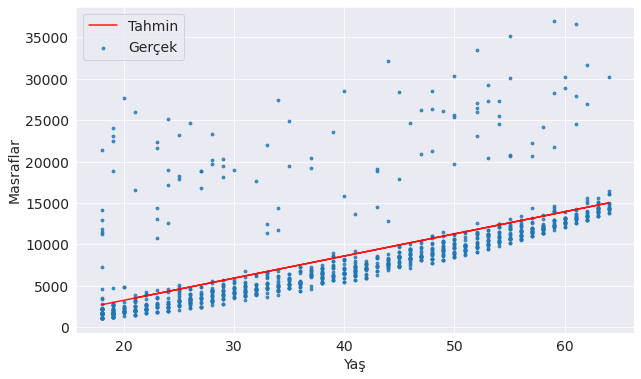

In [ ]:
parametreleri_dene(model.coef_, model.intercept_)

Gerçekten de çizgi noktalara oldukça yakın. Nokta kümesinin biraz üzerindedir, çünkü aynı zamanda aykırı değerleri de hesaba katmaya çalışır.

> **ALIŞTIRMA**: Stokastik gradyan iniş tekniğini (stochastic gradient descent technique) kullanarak bir modeli eğitmek (train) için `scikit-learn`'deki [`SGDRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) sınıfını kullanın. Tahminler yapın ve kaybı hesaplayın. Sonuç olarak herhangi bir fark görüyor musunuz?

> **ALIŞTIRMA**: Sigara içenlerin tıbbi masraflarını tahmin etmek için doğrusal bir regresyon (linear regression) modeli eğitmek (train) için bu bölümdeki adımları tekrarlayın. Hedefleri ve tahminleri görselleştirin ve kaybı hesaplayın.

### Makine Öğrenmesi (Machine Learning)

Tebrikler! Az önce ilk _makine öğrenimi modelinizi_ eğittiniz! Makine öğrenimi, bazı özellikler ve hedefler arasındaki ilişkiyi modellemek için en iyi parametreleri hesaplama sürecidir.

Her makine öğrenimi probleminin üç bileşeni vardır:

1. **Model**

2. **Maliyet Fonksiyonu (Cost Function)**

3. **Optimize Edici (Optimizer)**

Gelecekteki öğreticilerde yukarıdakilerin her birinin birkaç örneğine bakacağız. Bu üç bileşen arasındaki ilişkinin nasıl görselleştirilebileceği aşağıda açıklanmıştır:

<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

Yukarıda gördüğümüz gibi, `scikit-learn` kullanarak bir makine öğrenimi modelini eğitmek (train) için sadece birkaç satır kod yeterlidir.

In [ ]:
# Girdiler (inputs) ve hedefler (targets) oluşturalım.
girdiler, hedefler = sigara_icmeyen_df[['age']], sigara_icmeyen_df['charges']

# Modeli oluşturalım ve eğitelim.
model = LinearRegression().fit(girdiler, hedefler)

# Tahminler oluşturalım.
tahminler = model.predict(girdiler)

# Modeli değerlendirmek için kayıp (loss) hesaplayalım.
kayip = rmse(hedefler, tahminler)
print('Kayıp:', kayip)

Kayıp: 4662.505766636391


## Çoklu Özellik (Multiple Features) Kullanan Doğrusal Regresyon (Linear Regression)

Şimdiye kadar, `masrafları` tahmin etmek için `yaş` özelliğini kullandık. `Bmi` gibi başka bir özellik eklemek oldukça basittir. Basitçe aşağıdaki ilişkiyi varsayıyoruz:

$masraflar = w_1 \times yas + w_2 \times bmi + b$

BMI'yi dahil etmek için sadece bir kod satırını değiştirmemiz gerekiyor.

In [ ]:
# Girdiler (inputs) ve hedefler (targets) oluşturalım.
girdiler, hedefler = sigara_icmeyen_df[['age', 'bmi']], sigara_icmeyen_df['charges']

# Modeli oluşturalım ve eğitelim.
model = LinearRegression().fit(girdiler, hedefler)

# Tahminler oluşturalım.
tahminler = model.predict(girdiler)

# Modeli değerlendirmek için kayıp (loss) hesaplayalım.
kayip = rmse(hedefler, tahminler)
print('Kayıp:', kayip)

Kayıp: 4662.312835461298


Gördüğünüz gibi, BMI'nin özellikle sigara içmeyenler için, masraflarla çok zayıf bir korelasyonu olduğundan, BMI'yi eklemek kaybı çok fazla azaltmıyor gibi görünüyor.

In [ ]:
sigara_icmeyen_df.charges.corr(sigara_icmeyen_df.bmi)

0.08403654312833268

In [ ]:
fig = px.scatter(sigara_icmeyen_df, x='bmi', y='charges', title='BMI vs. Masraflar')
fig.update_traces(marker_size=5)
fig.show()

Ayrıca bir 3 boyutlu dağılım grafiği kullanarak 3 değişkenin: `yaş`, `bmi` ve `masraflar` tümü arasındaki ilişkiyi görselleştirebiliriz.

In [ ]:
fig = px.scatter_3d(sigara_icmeyen_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

2 boyutlu dağılım grafiğine kıyasla 3 boyutlu dağılım grafiğini yorumlamanın daha zor olduğunu görebiliriz. Daha fazla özellik ekledikçe, tüm özellikleri bir kerede görselleştirmek imkansız hale geliyor, bu yüzden korelasyon ve kayıp gibi ölçümler (measures) kullanıyoruz.

Modelin parametrelerini de kontrol edelim.

In [ ]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

Açıkçası, BMI çok daha düşük bir ağırlığa sahiptir ve nedenini görebiliriz. Küçük bir katkısı var ve bu bile muhtemelen tesadüfi. Bu akılda tutulması gereken önemli bir noktadır: Hangi makine öğrenimi tekniğini veya optimizasyon algoritmasını uygularsanız uygulayın, var olmayan bir ilişki bulamazsınız.

> **ALIŞTIRMA**: Yalnızca BMI kullanarak masrafları tahmin etmek için doğrusal bir regresyon (linear regression) modeli eğitin. Daha önce eğitilmiş (trained) modellerden daha iyi veya daha kötü olmasını mı bekliyorsunuz? 

Bir adım daha ileri gidelim ve son sayısal sütunu ekleyelim: `masraflar` ile bir ilişkisi var gibi görünen `çocuklar`.

$masraflar = w_1 \times yas + w_2 \times bmi + w_3 \times cocuklar + b$

In [ ]:
sigara_icmeyen_df.charges.corr(sigara_icmeyen_df.children)

0.13892870453542194

In [ ]:
fig = px.strip(sigara_icmeyen_df, x='children', y='charges', title= "Çocuklar vs. Masraflar")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [ ]:
# Girdiler (inputs) ve hedefler (targets) oluşturalım.
girdiler, hedefler = sigara_icmeyen_df[['age', 'bmi', 'children']], sigara_icmeyen_df['charges']

# Modeli oluşturalım ve eğitelim.
model = LinearRegression().fit(girdiler, hedefler)

# Tahminler oluşturalım.
tahminler = model.predict(girdiler)

# Modeli değerlendirmek için kayıp (loss) hesaplayalım.
kayip = rmse(hedefler, tahminler)
print('Kayıp:', kayip)

Kayıp: 4608.470405038245


Bir kez daha, BMI durumundan daha büyük olmasına rağmen, kayıpta büyük bir azalma görmüyoruz.

> **ALIŞTIRMA**: Sigara içenlerin medikal masraflarını tahmin etmek için doğrusal bir regresyon (linear regression) modeli eğiterek bu bölümdeki adımları tekrarlayalım. Hedefleri ve tahminleri görselleştirelim ve kaybı hesaplayalım.

> **ALIŞTIRMA**: Tüm müşteriler için medikal masrafları tahmin etmek üzere doğrusal bir regresyon (linear regression) modeli eğitmek için bu bölümdeki adımları tekrarlayalım. Hedefleri ve tahminleri görselleştirelim ve kaybı hesaplayalım. Kayıp daha mı düşük yoksa daha mı yüksek?

In [ ]:
# Girdiler (inputs) ve hedefler (targets) oluşturalım.
girdiler, hedefler = medikal_df[['age', 'bmi', 'children']], medikal_df['charges']

# Modeli oluşturalım ve eğitelim.
model = LinearRegression().fit(girdiler, hedefler)

# Tahminler oluşturalım.
tahminler = model.predict(girdiler)

# Modeli değerlendirmek için kayıp (loss) hesaplayalım.
kayip = rmse(hedefler, tahminler)
print('Kayıp:', kayip)

Kayıp: 11355.317901125969


## Makine Öğrenimi için Kategorik Özellikleri Kullanma

Şimdiye kadar yalnızca sayısal sütunlar kullandık, çünkü yalnızca sayılarla hesaplamalar yapabiliriz. `Sigara içen` gibi kategorik sütunları kullanabilirsek, tüm veri kümesi için tek bir model eğitebiliriz.

Kategorik sütunları kullanmak için onları sayılara dönüştürmemiz yeterlidir. Bunu yapmak için üç yaygın teknik vardır:

1. Bir kategorik sütunun yalnızca iki kategorisi varsa (buna ikili kategori denir), o zaman değerlerini 0 ve 1 ile değiştirebiliriz.
2. Kategorik bir sütunda 2'den fazla kategori varsa, one-hot encoding yapabilir, yani her kategori için 1'ler ve 0'lar ile yeni bir sütun oluşturabiliriz.
3. Kategorilerin doğal bir düzeni varsa (örn. soğuk, nötr, ılık, sıcak), sıra korunarak sayılara (örn. 1, 2, 3, 4) dönüştürülebilir. Bunlara sıra denir.

## İkili Kategoriler (Binary Categories)

`Sigara içen` kategorisinin yalnızca "evet" ve "hayır" olmak üzere iki değeri vardır. "Hayır" için 0 ve "evet" için 1 içeren yeni bir `sigara_icen_kodu` sütunu oluşturalım.

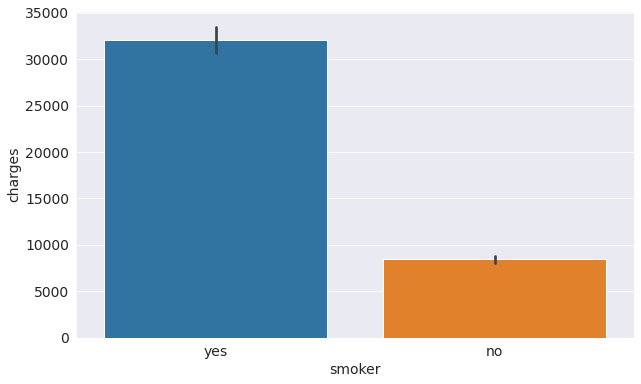

In [ ]:
sns.barplot(data=medikal_df, x='smoker', y='charges');

In [ ]:
sigara_icen_kodlari = {'no': 0, 'yes': 1}
medikal_df['smoker_code'] = medikal_df.smoker.map(sigara_icen_kodlari)

In [ ]:
medikal_df.charges.corr(medikal_df.smoker_code)

0.787251430498478

In [ ]:
medikal_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


Artık doğrusal regresyon (linear regression) için `sigara_icen_df` sütununu kullanabiliriz.

$masraflar = w_1 \times yas + w_2 \times bmi + w_3 \times cocuklar + w_4 \times sigaraicen + b$

In [ ]:
# Girdiler (inputs) ve hedefler (targets) oluşturalım.
girdiler, hedefler = medikal_df[['age', 'bmi', 'children', 'smoker_code']], medikal_df['charges']

# Modeli oluşturalım ve eğitelim.
model = LinearRegression().fit(girdiler, hedefler)

# Tahminler oluşturalım.
tahminler = model.predict(girdiler)

# Modeli değerlendirmek için kaybı (loss) hesaplayalım.
kayip = rmse(hedefler, tahminler)
print('Kayıp:', kayip)

Kayıp: 6056.439217188077


Kayıp `11355`'ten `6056`'ya düşüyor, neredeyse %50! Bu önemli bir derstir: Kategorik verileri asla göz ardı etmeyelim.

`Cinsiyet` sütununu da eklemeyi deneyelim.

$masraflar = w_1 \times yas + w_2 \times bmi + w_3 \times cocuklar + w_4 \times sigaraicen + w_5 \times cinsiyet + b$

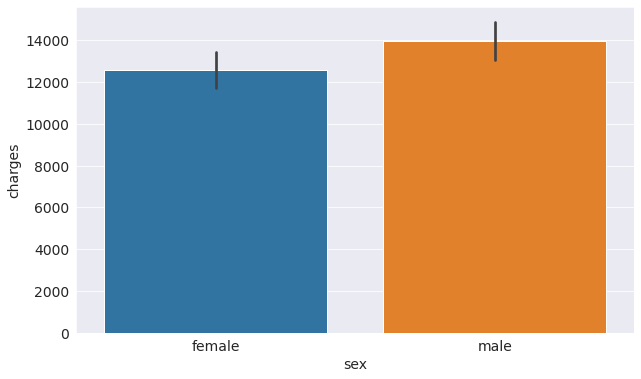

In [ ]:
sns.barplot(data=medikal_df, x='sex', y='charges')

In [ ]:
cinsiyet_kodlari = {'female': 0, 'male': 1}

In [ ]:
medikal_df['sex_code'] = medikal_df.sex.map(cinsiyet_kodlari)

In [ ]:
medikal_df.charges.corr(medikal_df.sex_code)

0.057292062202025484

In [ ]:
# Girdiler (inputs) ve hedefler (targets) oluşturalım.
girdiler, hedefler = medikal_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medikal_df['charges']

# Modeli oluşturalım ve eğitelim.
model = LinearRegression().fit(girdiler, hedefler)

# Tahminler oluşturalım.
tahminler = model.predict(girdiler)

# Modeli değerlendirmek için kayıp (loss) hesaplayalım.
kayip = rmse(hedefler, tahminler)
print('Kayıp:', kayip)

Kayıp: 6056.100708754539


Tahmin edebileceğiniz gibi, bunun kayıp üzerinde önemli bir etkisi var.

### One-hot Encoding

`Bölge` sütunu 4 değer içerir, bu nedenle hot encoding kullanmamız ve her bölge için yeni bir sütun oluşturmamız gerekecek.

![](https://i.imgur.com/n8GuiOO.png)

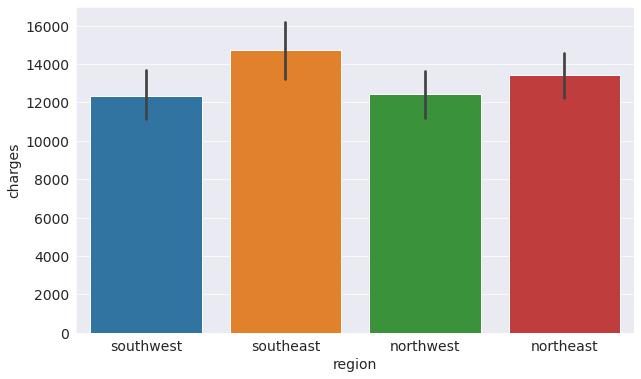

In [ ]:
sns.barplot(data=medikal_df, x='region', y='charges');

In [ ]:
from sklearn import preprocessing

In [ ]:
enc = preprocessing.OneHotEncoder()

In [ ]:
enc.fit(medikal_df[['region']])

OneHotEncoder()

In [ ]:
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
one_hot = enc.transform(medikal_df[['region']]).toarray()

In [ ]:
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
medikal_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [ ]:
medikal_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


`Bölge` sütunlarını doğrusal regresyon (linear regression) modelimize dahil edelim.

$masraflar = w_1 \times yas + w_2 \times bmi + w_3 \times cocuklar + w_4 \times sigaraicen + w_5 \times cinsiyet + w_6 \times bolge + b$

In [ ]:
# Girdiler (inputs) ve hedefler (targets) oluşturalım.
sutunlarin_girdisi = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
girdiler, hedefler = medikal_df[sutunlarin_girdisi], medikal_df['charges']

# Modeli oluşturalım ve eğitelim.
model = LinearRegression().fit(girdiler, hedefler)

# Tahminler oluşturalım.
tahminler = model.predict(girdiler)

# Modeli değerlendirmek için kayıp (loss) hesaplayalım.
kayip = rmse(hedefler, tahminler)
print('Kayıp:', kayip)

Kayıp: 6041.679651174453


Bir kez daha, bu kayıpta oldukça küçük bir azalmaya yol açar.

> **ALIŞTIRMA**: Biri sigara içenler ve biri sigara içmeyenler için olmak üzere iki ayrı doğrusal regresyon (linear regression) modeli, tek bir doğrusal regresyon (linear regression) modelinden daha mı iyi? Neden veya neden olmasın? Deneyin ve cevabınızı verilerle haklı gösterip gösteremeyeceğinizi görün.

## Model İyileştirmeleri (Model Improvements)

Tartışalım ve modelimize biraz daha iyileştirme uygulayalım.

### Özellik Ölçeklendirme (Feature Scaling)

Düzenleyici gereksinim (regulatory requirements) nedeniyle, modelimizin tahminlerinin arkasındaki mantığı da açıklamamız gerektiğini hatırlayalım.

$masraflar = w_1 \times yas + w_2 \times bmi + w_3 \times cocuklar + w_4 \times sigaraicen + w_5 \times cinsiyet + w_6 \times bolge + b$

Modeldeki her özelliğin önemini karşılaştırmak için, ilk içgüdümüz onların ağırlıklarını karşılaştırmak olabilir.

In [ ]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [ ]:
model.intercept_

-12525.547811195444

In [ ]:
agirliklari_df = pd.DataFrame({
    'feature': np.append(sutunlarin_girdisi, 1),
    'weight': np.append(model.coef_, model.intercept_)
})

In [ ]:
agirliklari_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


`BMI` ve `kuzeydoğu` `yaş`'dan daha yüksek bir ağırlığa sahip gibi görünse de, `BMI` için değer aralığının sınırlı olduğunu (15 ila 40) ve `kuzeydoğu` sütununun yalnızca 0 ve 1 değerlerini aldığını unutmayın.

Farklı sütunların farklı aralıkları olduğundan, iki sorunla karşılaşıyoruz:

1. Hangi özelliklerin önemli olduğunu belirlemek için farklı sütunların ağırlıklarını karşılaştıramayız.
2. Daha geniş bir girdi aralığına sahip bir sütun, kaybı orantısız bir şekilde etkileyebilir ve optimizasyon sürecine hakim olabilir.

Bu nedenle, sayısal sütundaki değerleri ortalamayı çıkararak ve standart sapmaya bölerek ölçeklemek (veya standartlaştırmak) yaygın bir uygulamadır.

![](https://i.imgur.com/dT5fLFI.png)

`scikit-learn`'den StandardScaler sınıfını kullanarak ölçekleme uygulayabiliriz.

In [ ]:
medikal_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sayisal_sutunlar = ['age', 'bmi', 'children'] 

In [ ]:
olcekleyici = StandardScaler()

In [ ]:
olcekleyici.fit(medikal_df[sayisal_sutunlar])

StandardScaler()

In [ ]:
olcekleyici.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
olcekleyici.var_

array([197.25385199,  37.16008997,   1.45212664])

Artık verileri aşağıdaki gibi ölçeklendirebiliriz:

In [ ]:
olceklenmis_girdiler = olcekleyici.transform(medikal_df[sayisal_sutunlar])

In [ ]:
olceklenmis_girdiler

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

Bunları artık kategorik verilerle birleştirebiliriz.

In [ ]:
kategorik_sutunlar = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
kategorik_veriler = medikal_df[kategorik_sutunlar].values

In [ ]:
girdiler = np.concatenate((olceklenmis_girdiler, kategorik_veriler), axis=1)
hedefler = medikal_df.charges

# Modeli oluşturalım ve eğitelim.
model = LinearRegression().fit(girdiler, hedefler)

# Tahminler oluşturalım.
tahminler = model.predict(girdiler)

# Modeli değerlendirmek için kayıp (loss) hesaplayalım.
kayip = rmse(hedefler, tahminler)
print('Kayıp:', kayip)

Kayıp: 6041.679651174453


Şimdi formüldeki ağırlıkları karşılaştırabiliriz:

$masraflar = w_1 \times yas + w_2 \times bmi + w_3 \times cocuklar + w_4 \times sigaraicen + w_5 \times cinsiyet + w_6 \times bolge + b$

In [ ]:
agirliklari_df = pd.DataFrame({
    'feature': np.append(sayisal_sutunlar + kategorik_sutunlar, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
agirliklari_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


Şimdi görebileceğiniz gibi, en önemli özellikler:

1. Sigara içen
2. Yaş
3. BMI

### Test Seti Oluşturma

Bu eğitimde oluşturduğumuza benzer modeller, gerçek dünyada kullanılmak üzere tasarlanmıştır. Modelin sonuçlarını test etmek ve raporlamak için verilerin küçük bir kısmını (örneğin %10) ayırmak yaygın bir uygulamadır.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_girdileri, test_girdileri, train_hedefleri, test_hedefleri = train_test_split(girdiler, hedefler, test_size=0.1)

In [ ]:
# Modeli oluşturalım ve eğitelim.
model = LinearRegression().fit(train_girdileri, train_hedefleri)

# Tahminler oluşturalım.
test_tahminleri = model.predict(test_girdileri)

# Modeli değerlendirmek için kayıp (loss) hesaplayalım.
kayip = rmse(test_hedefleri, test_tahminleri)
print('Test Kaybı:', kayip)

Test Kaybı: 6050.022523154977


Bunu training kaybıyla karşılaştıralım.

In [ ]:
# Tahminler oluşturalım.
train_tahminleri = model.predict(train_girdileri)

# Modeli değerlendirmek için kaybı hesaplayalım.
kayip = rmse(train_hedefleri, train_tahminleri)
print('Training Kaybı:', kayip)

Training Kaybı: 6044.2958507830845


Training kaybının neden test kaybından daha düşük olduğunu açıklayabilir misiniz? Bunu gelecekteki eğitimlerde çok daha ayrıntılı olarak tartışacağız.

### Bir Makine Öğrenimi Problemine Nasıl Yaklaşılır?

Herhangi bir makine öğrenimi problemine yaklaşmak için uygulayabileceğimiz bir strateji:

1. Verileri keşfedin ve girdiler ile hedefler arasındaki korelasyonları bulun.
2. Eldeki problem için doğru modeli, kayıp fonksiyonlarını ve optimize ediciyi seçin.
3. Sayısal değişkenleri ve one-hot encode kategorik verileri ölçeklendirin.
4. Bir test seti ayırın. (training setinin bir kısmını kullanarak)
5. Modeli eğitin.
6. Test seti üzerinde tahminler yapın ve kaybı hesaplayın.

Bu işlemi gelecekteki eğitimlerde birkaç probleme uygulayacağız.

## Özet ve İleri Okuma

Bu eğitimde aşağıdaki konuları ele aldık:

- Makine öğrenimi için genel bir problem tanımı.
- Makine öğrenimi için bir veri kümesini indirme ve keşfetme.
- Scikit-learn kullanarak tek değişkenli doğrusal regresyon (linear regression).
- Birden çok değişkenli doğrusal regresyon (linear regression). 
- Makine öğrenimi için kategorik özellikleri kullanma.
- Regresyon katsayıları ve özellik önemi.
- Sonuçların raporlanması için training ve test seti oluşturma.

Bu eğitimde kapsanan teknikleri aşağıdaki veri kümelerine uygulayın:

- https://www.kaggle.com/vikrishnan/boston-house-prices
- https://www.kaggle.com/sohier/calcofi
- https://www.kaggle.com/budincsevity/szeged-weather 


Doğrusal regresyon (linear regression) hakkında daha fazla bilgi edinmek için aşağıdaki bağlantılara göz atın:

- https://jovian.ai/aakashns/02-linear-regression
- https://www.kaggle.com/hely333/eda-regression
- https://www.youtube.com/watch?v=kHwlB_j7Hkc

## Gözden Geçirme Soruları
1.	Verilere bir model sığdırmadan (fitting a model) önce neden Keşifsel Veri Analizi (EDA) yapmak zorundayız?
2.	Parametre nedir?
3.	Korelasyon nedir?
4.	Negatif korelasyon ne anlama geliyor?
5.	Python'da değişkenler (variables) arasındaki korelasyonu nasıl bulabilirsiniz?
6.	Nedensellik nedir? Korelasyon ve nedensellik arasındaki farkı bir örnekle açıklayın.
7.	Doğrusal Regresyonu (Linear Regression) tanımlayın.
8.	Tek değişkenli doğrusal regresyon nedir?
9.	Çok değişkenli doğrusal regresyon nedir?
10.	Ağırlıklar (weights) ve önyargı (bias) nedir?
11.	Girdiler ve hedefler nelerdir?
12.	Kayıp/maliyet fonksiyonu nedir?
13.	Kalıntı (residual) nedir?
14.	RMSE değeri nedir? Ne zaman ve neden kullanıyoruz?
15.	Optimize Edici Nedir? Farklı optimize edici türleri nelerdir? Her birini bir örnekle açıklayın.
16.	Doğrusal Regresyon (Linear Regression) gerçekleştirmek için Python'da hangi kütüphane mevcuttur?
17.	<code>sklearn.linear_model </code> nedir?
18.	<code>model.fit()</code> ne yapar? Hangi argümanlar verilmelidir?
19.	<code>model.predict()</code> ne yapar? Hangi argümanlar verilmelidir?
20.	RMSE değerlerini nasıl hesaplarız?
21.	<code>model.coef_</code> nedir?
22.	<code>model.intercept_</code> nedir?
23.	SGDRegressor nedir? Doğrusal Regresyondan (Linear Regression) farkı nedir ?
24.	Makine Öğrenimi'ni tanımlayın. Makine Öğreniminin ana bileşenleri nelerdir?
25.	Kayıp değeri, modelin iyi olup olmadığını belirlemede nasıl yardımcı olur?
26.	Sürekli (continuous) ve kategorik değişkenler (variables) nelerdir?
27.	Makine Öğreniminde kategorik değişkenleri nasıl ele alıyoruz? Yaygın teknikler nelerdir?
28.	Özellik ölçekleme (feature scaling) nedir? Makine Öğreniminde nasıl yardımcı olur?
29.	Python'da ölçeklemeyi (scaling) nasıl yapıyoruz?
30.	<code>sklearn.preprocessing</code> nedir?
31.	Test seti nedir?
32.	Python'da model uydurma (training ve test) için verileri nasıl böleriz (split)?
33.	Bir Makine Öğrenimi problemine nasıl yaklaşırız?